## Observations and Insights 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#from scipy.stats import linregress
import scipy.stats as st 
#import linregress
import numpy as np
from sklearn import datasets
import csv
import collections

from IPython.display import HTML



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

f = open("data/Study_results.csv",'r')

readerm = csv.reader(f)
mr_mouse = []

for row in readerm:
    mr_mouse.append([row[0],(row[1]),row[2],row[3]])
    
#print("Mouses in the list")
#for item in mr_mouse:
    #print(item)

#print(" ",mr_mouse)
#speedy_g

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
#print(study_results_df)
#mouse_dict = []
#for row in 
#for i in range(len(study_results_df)):
#    mouxicon[study_results_df[i]]= study_results_df.count(study_results_df[i])

# Combine the data into a single dataset
data_merged = pd.merge(mouse_metadata_df, study_results_df, on ="MouseID", how= "outer")

#nd = []
##for key,value in study_results_df.items():
  #  if value not in study_results_df.values():
  #      nd[key] = value
#print(nd)
# Display the data table for preview

#print(nd)
#mouse_metadata.head()
#study_results_df.shape
#study_results_df.head(1894)
data_merged.count()

MouseID               1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [41]:
#dup_mouse = study_results_df.MouseID.duplicated()
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#dup_mouse.MouseID.duplicated()
#dup_mouse.head(10)
#study_results_df.loc[study_results_df.duplicated(), :]
#study_results_df['MouseID','Timepoint'].duplicated()

# Create a DataFrame object
dfObj = pd.DataFrame(study_results_df, columns=['MouseID', 'Timepoint'])

# Find a duplicate rows
duplicateDFRow = dfObj[dfObj.duplicated(keep='last')]
print(duplicateDFRow)

    MouseID  Timepoint
107    g989          0
329    g989          5
620    g989         10
815    g989         15
950    g989         20


In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
#study_results_df['MouseID'].drop_duplicates().shape
#cntr = len( study_results_df['MouseID'].unique())
#study_results_df.MouseID.duplicated()
#----------dupl = study_results_df.MouseID.duplicated().sum()
#----------study_results_df.duplicated().sum()
#----------study_results_df.loc[study_results_df.duplicated(), :]
#study_results_df.MouseID.loc[study_results_df.MouseID.duplicated(), :]
#print("Numero de duplicados", dupl)
#unique_mouses = study_results_df.MouseID.drop_duplicates(keep='first')

#tmouses = pd.DataFrame({"mouses" :[cntr]})
#same as duplicateDFRow 
data_merged.count()

MouseID               1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [69]:
#Assessing duplicates out of the merge
duplicated_mice = data_merged[data_merged[["MouseID","Timepoint"]].duplicated()==True]

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
st_mouses_df = study_results_df.drop_duplicates(subset = ['MouseID','Timepoint'])

#st_mouses_df
#HTML(st_mouses_df.to_html(classes = 'table table-striped'))

In [44]:
#st_mouses_df.shape
st_mouses_df
#Comparing these two methods to disclose duplicates checking 2 columns reference 
#The one at In[147] above, and this one having merged both files, there is a coincidence.

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [45]:
duplicated_mice

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
data_merged.drop([909,911,913,915,917], inplace = True)

In [47]:
# Checking the number of mice in the clean DataFrame.
data_merged["MouseID"].value_counts()

h246    10
l509    10
e227    10
r554    10
a411    10
        ..
h428     1
v199     1
t573     1
n482     1
x336     1
Name: MouseID, Length: 249, dtype: int64

In [11]:
#Duplicates gone, remaining rows
#data_merged.count()
st_mouses_df

,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#st_mouses_df
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Demonstrate calculating measures of central tendency
#pd.DataFrame(study_results_df, columns=['MouseID', 'Timepoint'])

#"mean_numpy = np.mean(study_results_df)
#"print(f"The mean temperature at the LAX airport is {mean_numpy}")

#"median_numpy = np.median(study_results_df)
#"print(f"The median temperature at the LAX airport is {median_numpy}")

#"mode_scipy = sts.mode(study_results_df)
#"print(f"The mode temperature at the LAX airport is {mode_scipy}")

summary_statistics = data_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,np.std])
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_statistics


,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.393463,50.909965,43.138803,6.568014
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

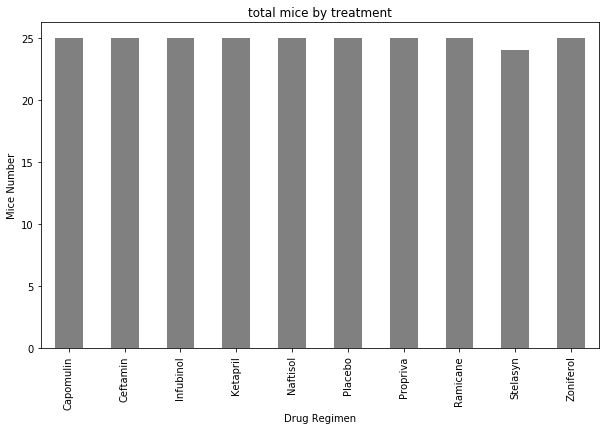

In [49]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = data_merged.groupby(["Drug Regimen"]).agg({"MouseID":"nunique"})

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female 
#or male mice in the study.
# Using Pandas
mice_count_bar = mice_count.plot(kind='bar',title="total mice by treatment", legend=False, color="grey")

mice_count_bar.set_xlabel("Drug Regimen")
mice_count_bar.set_ylabel("Mice Number")
plt.show()

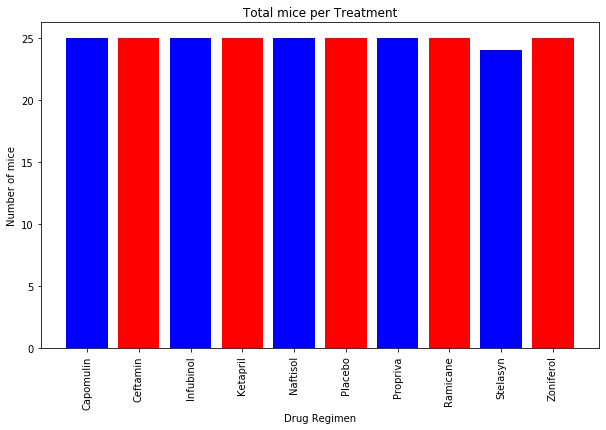

In [50]:
# Using Matplotlib
x_axis = np.arange(len(mice_count.index))
x_axis

plt.bar(x_axis, mice_count["MouseID"], color='br',align ="center", width= 0.8)

tick_locations =[value for value in x_axis]
plt.xticks(tick_locations, mice_count.index, rotation= "vertical")

plt.title("Total mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

plt.show()


No handles with labels found to put in legend.


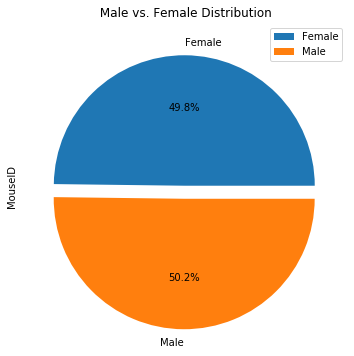

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
from matplotlib import rcParams
mice_sex_count = mouse_metadata_df.groupby(["Sex"])["MouseID"].count()

rcParams['figure.figsize']=10,6
plt.legend(loc=2);

mice_count_pie = mice_sex_count.plot(kind='pie',radius = 1.0, autopct='%0.1f%%', title=" Male vs. Female Distribution", legend = True, explode=[0,0.1])
#plt.legend(loc=2)
plt.show()


(-1.1199395799512024,
 1.1085163149757233,
 -1.1187480755433892,
 1.108793637086287)

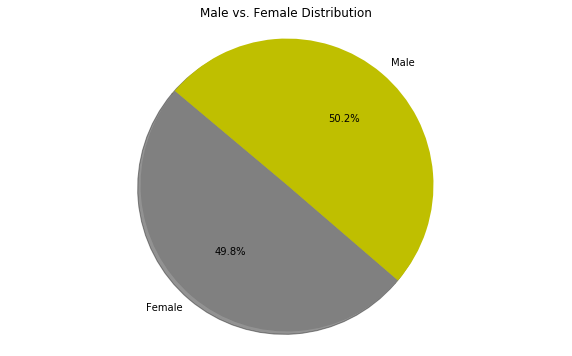

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_count_sex = mouse_metadata_df.groupby(["Sex"])["MouseID"].count().to_frame("count")
sizes = mice_count_sex["count"]
colors = ["grey","y"]
#labels = ["javaScript","HTML/CSS","SQL","Python","Java","Bash/Shell/PowerShell","C#","PHP","C++","TypeScript","C","Other(s):","Ruby","Go","Assembly"]
#plt.pie(slices, labels = labels, colors = colors, autopct ="%1.1f%%", shadow = True, startangle = 90)
labels = mice_count_sex.index

plt.pie(sizes, labels = labels,colors = colors, autopct='%0.1f%%',shadow = True, startangle = 140)
plt.title("Male vs. Female Distribution")
# wedgeprops = {'edgecolor : black '}
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [53]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. 

# Start by getting the last (greatest) timepoint for each mouse
data_filtered = data_merged[(data_merged["Drug Regimen"]=="Capomulin")|
                            (data_merged["Drug Regimen"]=="Rumicane")|
                            (data_merged["Drug Regimen"]=="Infubino")|
                            (data_merged["Drug Regimen"]=="Ceftamin")]
data_grp = data_filtered.groupby(["MouseID"])["Timepoint"].max()
last_timepoint = pd.DataFrame({"Timepoint": data_grp})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_vol = last_timepoint.merge(data_merged, on=["MouseID","Timepoint"])
#last_tumor_vol
#last_timepoint
#data_filtered.count()
data_filtered.shape

(408, 8)

In [54]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_reg = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
outliers = []
 
#Calculate the quartiles and IQR and quantitatively     
# Determine outliers using upper and lower bounds

#Q1 = n/4 , Q2= 1/2n, Q=3n/4 where we have to the upper and lower sides represinting each the 25% of population  
#n = number of cases
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes


#Iterating across treatements
for n in range(len(tumor_vol)):
        quartiles = tumor_vol[n].quantile([0.25,0.5,0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)

#determine if there are any potential outliers across all four treatment regimens.
#El elemento interno es una serie y es necesario usar .iloc en ese elemento interno [i]
        for i in range(len(tumor_vol[n])):
            if(tumor_vol[n].iloc[i] < lower_bound) | (tumor_vol[n].iloc[i] > upper_bound):
                outliers.append(tumor_vol[n].iloc[i])
                
    # add subset 
for n in range(len(treatments_reg)):
    tumor_vol.append(last_tumor_vol["Tumor Volume (mm3)"][last_tumor_vol["Drug Regimen"] == treatments_reg[n]])
last_tumor_vol


,MouseID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b128,45,Capomulin,Female,9,22,38.982878,2
2,b447,0,Ceftamin,Male,2,30,45.000000,0
3,b487,25,Ceftamin,Female,6,28,56.057749,1
4,b742,45,Capomulin,Male,7,21,38.939633,0
5,b759,30,Ceftamin,Female,12,25,55.742829,1
6,f436,15,Ceftamin,Female,3,25,48.722078,2
7,f966,20,Capomulin,Male,16,17,30.485985,0
8,g288,45,Capomulin,Male,3,19,37.074024,1
9,g316,45,Capomulin,Female,22,22,40.159220,2


In [21]:
#mice_count
#last_tumor_vol

#capomulin_filter = last_tumor_vol[last_tumor_vol["Drug Regimen"] =='Capomulin']
#capomulin_filter
#Merged_table[merged_table[“Drug regimen”] ==‘Capimulin’]]

# Determine outliers using upper and lower bounds

#Q1 = n/4 , Q2= 1/2n, Q=3n/4 where we have to the upper and lower sides represinting each the 25% of population  
#n = number of cases
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

#Iterating across treatements
#for n in range(len(tumor_vol)):
#        quartiles = tumor_vol[n].quantile([0.25,0.5,0.75])
#        lowerq = quartiles[0.25]
#        upperq = quartiles[0.75]
#        iqr = upperq - lowerq
#        lower_bound = lowerq - (1.5*iqr)
#        upper_bound = upperq + (1.5*iqr)
        
#El elemento interno es una serie y es necesario usar .iloc en ese elemento interno [i]
#        for i in range(len(tumor_vol[n])):
#            if(tumor_vol[n].iloc[i] < lower_bound) | (tumor_vol[n].iloc[i] > upper_bound):
#                outliers.append(tumor_vol[n].iloc[i])
tumor_vol

[1     38.982878
 4     38.939633
 7     30.485985
 8     37.074024
 9     40.159220
 11    47.685963
 12    37.311846
 13    38.125164
 14    38.753265
 19    41.483008
 23    38.846876
 24    28.430964
 25    33.329098
 29    46.539206
 30    32.377357
 31    41.581521
 32    23.343598
 33    40.728578
 34    34.455298
 38    31.023923
 39    40.658124
 40    39.952347
 42    36.041047
 44    28.484033
 48    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 0     62.999356
 2     45.000000
 3     56.057749
 5     55.742829
 6     48.722078
 10    47.784682
 15    61.849023
 16    68.923185
 17    67.748662
 18    57.918381
 20    46.784535
 21    59.851956
 22    64.299830
 26    59.741901
 27    61.433892
 28    64.192341
 35    45.000000
 36    52.925348
 37    45.000000
 41    67.527482
 43    45.000000
 45    64.634949
 46    61.386660
 47    68.594745
 49    64.7298

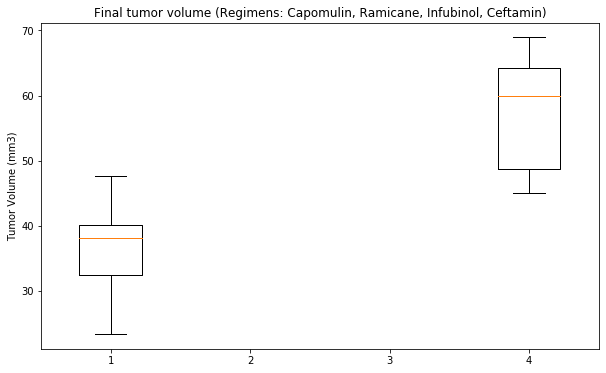

In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots()
ax1.set_title("Final tumor volume (Regimens: Capomulin, Ramicane, Infubinol, Ceftamin)")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol)
plt.show()

In [ ]:
tumor_vol

In [56]:
# Start by getting the last (greatest) timepoint for each mouse
data_filtered = data_merged[(data_merged["Drug Regimen"]=="Capomulin")|
                            #(data_merged["Drug Regimen"]=="Rumicane")|
                            #(data_merged["Drug Regimen"]=="Infubino")|
                            #(data_merged["Drug Regimen"]=="Ceftamin")]
data_grp = data_filtered.groupby(["Drug Regimen"])["Timepoint"]#.max()
last_timepoint = pd.DataFrame({"Drug Regimen": data_grp})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#last_tumor_vol = last_timepoint.merge(data_merged, on=["MouseID","Timepoint"])
DRCap_Tp = last_timepoint.merge(data_merged, on=["Drug Regimen"])
#last_tumor_vol
#last_timepoint
DRCap_Tp

SyntaxError: invalid syntax (<ipython-input-56-38dfb1a14636>, line 6)

## Line and Scatter Plots

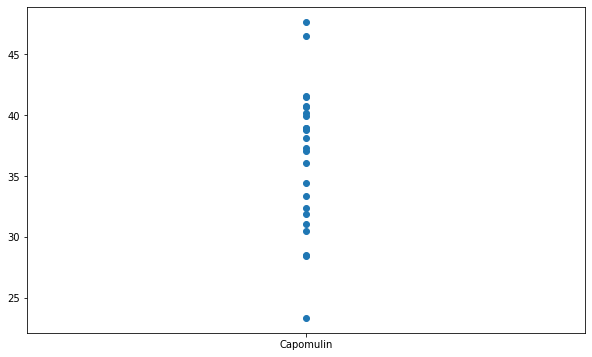

In [57]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#from matplotlib import rcParams
# Put treatments into a list for for loop (and later for plot labels)
#treatments_reg = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"

capomulin_filter = last_tumor_vol[last_tumor_vol["Drug Regimen"] =='Capomulin']
capomulin_filter


#-------------------------------------------------------------------------------------------------------------------------
#last_tumor_vol = last_timepoint.merge(data_merged, on=["MouseID","Timepoint"])

#CapTreatment = ["Capomulin"]
#capdata_filtered = data_merged[(data_merged["Drug Regimen"]=="Capomulin")]
                            #(data_merged["Drug Regimen"]=="Rumicane")|
                           #(data_merged["Drug Regimen"]=="Infubino")|
                           #(data_merged["Drug Regimen"]=="Ceftamin")]
##capdata_grp = capdata_filtered.groupby(["MouseID"])["Timepoint"]
#caplast_timepoint = pd.DataFrame({"Timepoint": capdata_grp})

#mice_count = data_merged.groupby(["Drug Regimen"]).agg({"MouseID":"nunique"})

#for n in range(len(CapTreatment)):
#    tumor_vol.append(last_tumor_vol["Tumor Volume (mm3)"][last_tumor_vol["Drug Regimen"] == CapTreatment[n]])
#last_tumor_vol

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#cap_last_tumor_vol = last_timepoint.merge(data_merged, on=["Timepoint"])
x = capomulin_filter["Drug Regimen"]
y = capomulin_filter["Tumor Volume (mm3)"]
plt.scatter(x,y)
#"Drug Regimen"
#fahrenheit, = plt.plot(x_axis, cap_last_tumor_vol, marker="+",color="blue", linewidth=1, label="Fahreneit")                              
#cap_last_tumor_vol



In [25]:
capomulin_filter
#last_tumor_vol
#last_timepoint
#plt.scatter(last_tumor_vol, marker="o", facecolors="red", edgecolors="black")

,MouseID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
1,b128,45,Capomulin,Female,9,22,38.982878,2
4,b742,45,Capomulin,Male,7,21,38.939633,0
7,f966,20,Capomulin,Male,16,17,30.485985,0
8,g288,45,Capomulin,Male,3,19,37.074024,1
9,g316,45,Capomulin,Female,22,22,40.159220,2
11,i557,45,Capomulin,Female,1,24,47.685963,1
12,i738,45,Capomulin,Female,23,20,37.311846,2
13,j119,45,Capomulin,Female,7,23,38.125164,1
14,j246,35,Capomulin,Female,21,21,38.753265,1
19,l509,45,Capomulin,Male,17,21,41.483008,3


In [63]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_cap =capomulin_filter[capomulin_filter["MouseID"]== "r157"]
mouse_cap_df = pd.DataFrame(mouse_cap)
mouse_cap_df

#----------------------------------------------------------------------------------------
data_merged

mouse_cap =data_merged[data_merged["MouseID"]== "r157"]
mouse_cap_df = pd.DataFrame(mouse_cap)
mouse_cap_df

#x_axis = 
#x = capomulin_filter["Drug Regimen"]
#y = capomulin_filter["Tumor Volume (mm3)"]
#plt.plot(x,y)

#mkr_dict = {"Capomulin": 'x', 'Timepoint', 'y'}
#mkr_dict = ["Capomulin"]

#x = {cap_last_tumor_vol["Drug Regimen","Timepoint"]}
#x = cap_last_tumor_vol["Drug Regimen"]
#y = cap_last_tumor_vol["Timepoint"]

#df = pd.DataFrame(x)

#plt.scatter(df, marker = df.type.map(mkr_dict))

#plt.scatter(last_tumor_vol.iloc[:,1],last_tumor_vol.iloc[:,2])

#plt.scatter(last_tumor_vol["Drug Regimen"],last_tumor_vol["Timepoint"])
#plt.scatter(df.meters, df.Speed, marker = df.type.map(mkr_dict)) 


#caplast_timepoint

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0
1455,r157,Capomulin,Male,22,25,15,46.539206,0


Text(0.5, 1.0, 'Mouse weight vs. average tumor volume for Capomulin Regimen')

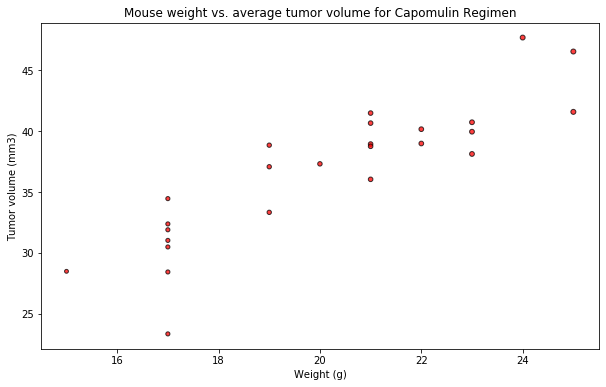

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

          
#rcParams['figure.figsize']=10,6
#plt.legend(loc=2);
#plt.grid(True)
#plt.title("Capulin Treatement / Time vs Tumor Volume")

#plt.ylabel("Time")
#plt.plot(tumor_vol)
#plt.plot(capomulin_filter)
#last_timepoint
#mkr_dict = {"Drug Regimen": 'x', "Timepoint": '+'}
#plt.scatter(capomulin_filter, capomulin_filter.Timepoint, marker = capomulin_filter.type.map(mkr_dict)) 

#capomulin_filter['val'] = capomulin_filter.apply(lambda x: type_dict[x['type']], axis=1)

#x = capomulin_filter["Drug Regimen"]
#y = capomulin_filter["Tumor Volume (mm3)"]

#capomulin_filter['type'].map(type_dict)
x_scat = capomulin_filter["Weight (g)"]
y_scat = capomulin_filter["Tumor Volume (mm3)"]
plt.scatter(x_scat,y_scat, marker ="o", facecolors = "red", edgecolors= "black", s=x_scat, alpha = 0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Mouse weight vs. average tumor volume for Capomulin Regimen")

## Correlation and Regression

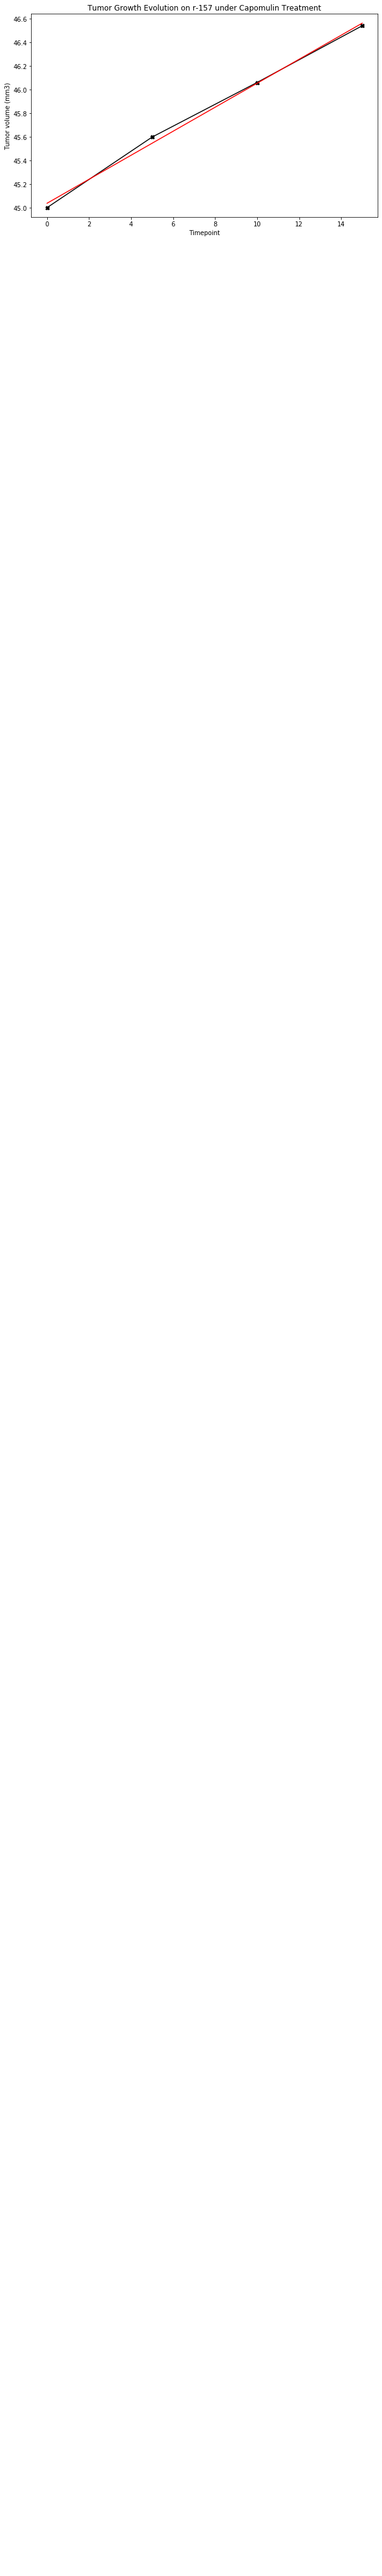

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#x_values = tumor_vol['Drug Regimen']
#y_values = tumor_vol['Timepoint']

#dr_Capomulin = last_tumor_vol.iloc[:,3]
#Timepointy = last_tumor_vol.iloc[:,1]
#corr = st.pearsonr(dr_Capomulin,Timepointy)
#plt.scatter(dr_Capomulin,Timepointy)

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq ="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.scatter(x_values, regress_values,"r-")
#plt.xlabel('Capomulin')
#plt.ylabel('Timepoint')
#plt.show()

#---------------------------------------------------
#x_axis = capomulin_filter["Timepoint"]
#y_axis = capomulin_filter["Tumor Volume (mm3)"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regress_values = x_axis * slope + intercept
#line_eq ="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plt.plot(x_axis, y_axis, marker ='o', color = 'black')
#plt.plot(x_axis, regress_values, "r-")
#plt.annotate(line_eq,(10,25),fontsize = 10, color ="red")
#plt.xlabel("Timepoint")
#plt.ylabel("Tumor volume (mm3)")
#plt.title("Progression of tumor with Capomulin for r157 case")
#plt.show()

#---------------------------------------------------------------------------
#mouse_cap_df

x_axis = mouse_cap_df["Timepoint"]
y_axis = mouse_cap_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq ="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(x_axis, y_axis, marker ='X', color = 'black')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(10,25),fontsize = 10, color ="red")
plt.ylabel("Tumor volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Tumor Growth Evolution on r-157 under Capomulin Treatment")
plt.show()
